# Hough Lines
The Hough Space is a 2D plane that has a horizontal axis representing the slope and the vertical axis representing the intercept of a line on the edge image. 

An edge point produces a cosine curve in the Hough Space. From this, if we were to map all the edge points from an edge image onto the Hough Space, it will generate a lot of cosine curves. If two edge points lay on the same line, their corresponding cosine curves will intersect each other on a specific (ρ, θ) pair. Thus, the Hough Transform algorithm detects lines by finding the (ρ, θ) pairs that has a number of intersections larger than a certain threshold.

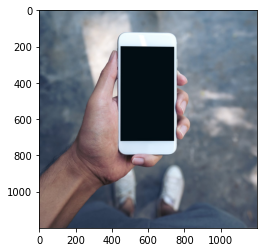

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('MobilePhone.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Perform Edge Detection

For the Hough Transform algorithm, it is crucial to perform edge detection first to produce an edge image which will then be used as input into the algorithm.

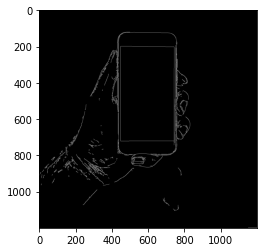

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

low_thre= 50
high_thre = 100
edges = cv2.Canny(gray, low_thre, high_thre)
plt.imshow(edges,cmap = 'gray')

## Finding lines using Hough transformer

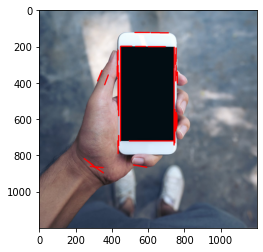

In [31]:
# Define Hough transformer parameters
# Make a blank the same size as our the input image size to draw on
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 50 
max_line_gap = 5
line_image = np.copy(image)

# perform Hough line detection on input image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# iterate over detected lines and draw on them on input image

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)